In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
larndsim_file = '/sdf/group/neutrino/sfogarty/ND_prototype_files/charge_data/2x2/MC/larndsim/MiniRun3_1E19_RHC.larnd_v2.00001.LARNDSIM.h5'
h5_larnd = h5py.File(larndsim_file,'r')

edepsim_file = '/sdf/group/neutrino/sfogarty/ND_prototype_files/charge_data/2x2/MC/edep-sim/MiniRun3_1E19_RHC.convert2h5_v3.00000.EDEPSIM.h5'
h5_edep = h5py.File(edepsim_file,'r')

tracks_larnd = h5_larnd['tracks']
traj_larnd = h5_larnd['trajectories']

tracks_edep = h5_edep['segments']
traj_edep = h5_edep['trajectories']

In [18]:
x_bounds = [-63.931, -3.069, 3.069, 63.931]
y_bounds = [-19.8543, 103.8543]
z_bounds = [-63.931, -3.069, 3.069, 63.931]

# test
#x_bounds = [-63.931, -10.069, 10.069, 63.931]
#y_bounds = [-19.8543, 103.8543]

## this appears to be a better bound for z 
z_bounds = [-63.931, -1.4, 1.4, 63.931]

# check if a value is between two bounds
def is_between(value, lower_bound, upper_bound):
    if np.size(value) == 1:
        return lower_bound < value and value < upper_bound
    else:
        return (lower_bound < value) & (value < upper_bound)

traj_plotting = traj_larnd
traj_start_all = traj_plotting['xyz_start']
traj_end_all = traj_plotting['xyz_end']
#traj_start_all = traj_edep['xyz_start']
#traj_end_all = traj_edep['xyz_end']
buffer = 1000 # cm

## for isolating trajectories that start and end outside active volume
is_outside_activeLAr_neg_x = is_between(np.array(traj_start_all[:,0]), np.min(x_bounds) - buffer, np.min(x_bounds)) \
    & is_between(np.array(traj_end_all[:,0]), np.min(x_bounds) - buffer, np.min(x_bounds))

is_outside_activeLAr_pos_x = is_between(np.array(traj_start_all[:,0]), np.max(x_bounds), np.max(x_bounds) + buffer) \
    & is_between(np.array(traj_end_all[:,0]), np.max(x_bounds), np.max(x_bounds) + buffer)

is_outside_activeLAr_neg_z = is_between(np.array(traj_start_all[:,2]), np.min(z_bounds) - buffer, np.min(z_bounds)) \
    & is_between(np.array(traj_end_all[:,2]), np.min(z_bounds) - buffer, np.min(z_bounds))

is_outside_activeLAr_pos_z = is_between(np.array(traj_start_all[:,2]), np.max(z_bounds), np.max(z_bounds) + buffer) \
    & is_between(np.array(traj_end_all[:,2]), np.max(z_bounds), np.max(z_bounds) + buffer)

is_outside_activeLAr_neg_y = is_between(np.array(traj_start_all[:,1]), np.min(y_bounds) - buffer, np.min(y_bounds)) \
    & is_between(np.array(traj_end_all[:,1]), np.min(y_bounds) - buffer, np.min(y_bounds))

is_outside_activeLAr_pos_y = is_between(np.array(traj_start_all[:,1]), np.max(y_bounds), np.max(y_bounds) + buffer) \
    & is_between(np.array(traj_end_all[:,1]), np.max(y_bounds), np.max(y_bounds) + buffer)

is_inside_deadspace_x = is_between(np.array(traj_start_all[:,0]), x_bounds[1], x_bounds[2]) \
    & is_between(np.array(traj_end_all[:,0]), x_bounds[1], x_bounds[2])

is_inside_deadspace_z = is_between(np.array(traj_start_all[:,2]), z_bounds[1], z_bounds[2]) \
    & is_between(np.array(traj_end_all[:,2]), z_bounds[1], z_bounds[2])

is_outside_activeLAr = is_outside_activeLAr_neg_x | is_outside_activeLAr_pos_x | is_outside_activeLAr_neg_z \
             | is_outside_activeLAr_pos_z | is_outside_activeLAr_neg_y | is_outside_activeLAr_pos_y \
             | is_inside_deadspace_x | is_inside_deadspace_z

## for isolating trajectories that start and end inside active volume
is_inside_activeLAr_x = is_between(np.abs(np.array(traj_start_all[:,0])), x_bounds[2], x_bounds[3]) \
    & is_between(np.abs(np.array(traj_end_all[:,0])), x_bounds[2], x_bounds[3])

is_inside_activeLAr_z = is_between(np.abs(np.array(traj_start_all[:,2])), z_bounds[2], z_bounds[3]) \
    & is_between(np.abs(np.array(traj_end_all[:,2])), z_bounds[2], z_bounds[3])

is_inside_activeLAr = is_inside_activeLAr_x & is_inside_activeLAr_z

Text(0.5, 1.0, 'Trajectories outside active LAr volume \n (larnd-sim; plotting only starting positions)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
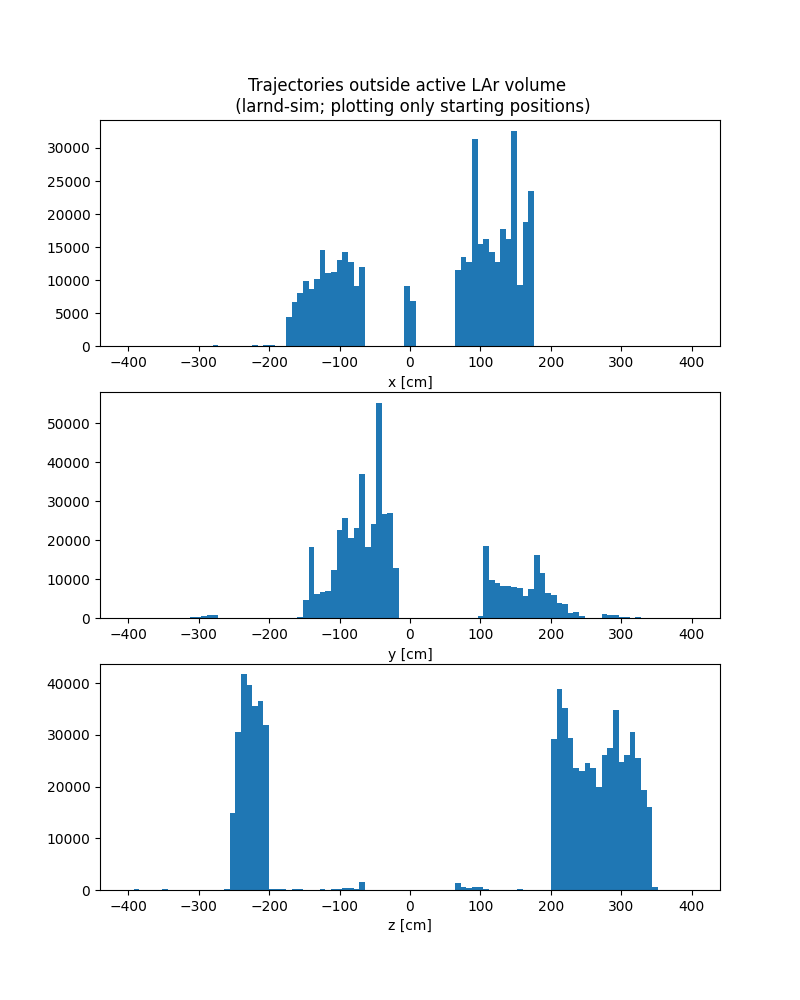

In [79]:
%matplotlib widget
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=False, sharey=False, figsize=(8,10))

nBins = 100

axes[0].hist(traj_plotting[is_outside_activeLAr_neg_x | is_outside_activeLAr_pos_x \
            | is_inside_deadspace_x]['xyz_start'][:,0], bins=nBins, range=(-400,400))
axes[0].set_xlabel('x [cm]')

axes[1].hist(traj_plotting[is_outside_activeLAr_neg_y | is_outside_activeLAr_pos_y]['xyz_start'][:,1], bins=nBins, range=(-400,400))
axes[1].set_xlabel('y [cm]')

axes[2].hist(traj_plotting[is_outside_activeLAr_neg_z | is_outside_activeLAr_pos_z \
            | is_inside_deadspace_z]['xyz_start'][:,2], bins=nBins, range=(-400,400))
axes[2].set_xlabel('z [cm]')
axes[0].set_title('Trajectories outside active LAr volume \n (larnd-sim; plotting only starting positions)')

Text(0.5, 1.0, 'Trajectories inside deadspace \n (larnd-sim; plotting only starting positions)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
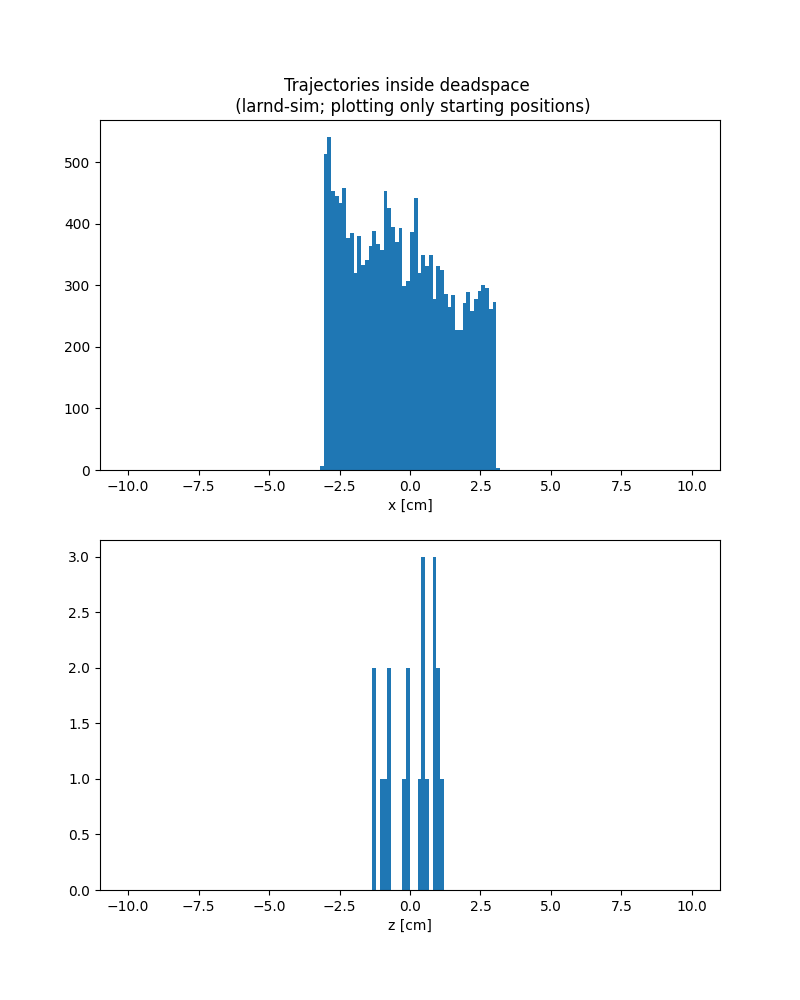

In [78]:
%matplotlib widget
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(8,10))

nBins = 150

axes[0].hist(traj_plotting[is_outside_activeLAr_neg_x | is_outside_activeLAr_pos_x \
            | is_inside_deadspace_x]['xyz_start'][:,0], bins=nBins, range=(-10,10))
axes[0].set_xlabel('x [cm]')

axes[1].hist(traj_plotting[is_outside_activeLAr_neg_z | is_outside_activeLAr_pos_z \
            | is_inside_deadspace_z]['xyz_start'][:,2], bins=nBins, range=(-10,10))
axes[1].set_xlabel('z [cm]')
axes[0].set_title('Trajectories inside deadspace \n (larnd-sim; plotting only starting positions)')

In [76]:
# for checking if the trajectories that are outside activeLAr have segments
# this loop takes a while so can stop whenever as long as you get a good sample of them

from tqdm import tqdm
#mask_to_test = is_outside_activeLAr_neg_z | is_outside_activeLAr_pos_z
mask_to_test = is_inside_deadspace_x

nWithoutTracks = 0
nWithTracks = 0
for i, Bool in tqdm(enumerate(mask_to_test)):
    if not Bool:
        continue
    else:
        tracks_outside = tracks_larnd[tracks_larnd['trackID'] == i]
        if np.size(tracks_outside) == 0:
            nWithoutTracks += 1
        else:
            nWithTracks += 1

84354it [00:06, 13580.46it/s]


KeyboardInterrupt: 

In [77]:
print(nWithoutTracks)
print(nWithTracks)
print(nWithoutTracks / (nWithTracks+nWithoutTracks))

1371
2
0.9985433357611071


In [19]:
# let's looks at trajectories that don't have segments, but making sure to only look inside the active vol
# can stop this loop early as long as you get a good sample for plotting
from tqdm import tqdm
mask_to_test = is_inside_activeLAr
indices = np.where(mask_to_test)[0]

nWithoutTracks = 0
nWithTracks = 0
E_start_notracks = []
E_start_withtracks = []
pdgID_notracks = []
pdgID_withtracks = []
xyz_start_notracks = []
xyz_start_withtracks = []
xyz_end_notracks = []
xyz_end_withtracks = []
length_notracks = []
length_withtracks = []

for i, index in tqdm(enumerate(indices)):
        traj = traj_plotting[index]
        tracks_thistraj_mask = tracks_larnd['trackID'] == index
        tracks_thistraj = tracks_larnd[tracks_thistraj_mask]
        if np.size(tracks_thistraj) == 0:
            nWithoutTracks += 1
            E_start_notracks.append(traj['E_start'])
            pdgID_notracks.append(traj['pdgId'])
            xyz_start_notracks.append(traj['xyz_start'])
            xyz_end_notracks.append(traj['xyz_end'])
            length_notracks.append(np.sqrt(np.sum((traj['xyz_end'] - traj['xyz_start'])**2)))
        else:
            nWithTracks += 1
            E_start_withtracks.append(traj['E_start'])
            pdgID_withtracks.append(traj['pdgId'])
            xyz_start_withtracks.append(traj['xyz_start'])
            xyz_end_withtracks.append(traj['xyz_end'])
            length_withtracks.append(np.sqrt(np.sum((traj['xyz_end'] - traj['xyz_start'])**2)))

10133it [00:45, 221.97it/s]


KeyboardInterrupt: 

(array([      -211,        -13,        -11,         11,         22,
              111,        211,       2112,       2212, 1000020030,
       1000080170, 1000120240, 1000120250, 1000140320, 1000150310,
       1000160340, 1000160350, 1000160360, 1000170370, 1000170390,
       1000180380, 1000180390, 1000180400], dtype=int32), array([   5,    3,    6, 1950,  196,    5,    2,   96,    4,    1,    1,
          2,    1,    1,    1,    2,    2,    1,    1,    1,    1,    2,
         17]))
(array([      -211,        -13,        -11,         11,         22,
              211,       2112,       2212, 1000010020, 1000010030,
       1000020040, 1000120240, 1000160320, 1000160340, 1000170350,
       1000170370, 1000170380, 1000180360, 1000180370, 1000180380,
       1000180390, 1000180400, 1000180410], dtype=int32), array([   1,    1,   97, 6257, 1161,    4,   50,   45,    4,    2,    7,
          1,    1,    1,    2,    1,    1,    1,    1,   11,   11,  171,
          1]))


[Text(1, 0, '-211'),
 Text(2, 0, '-13'),
 Text(3, 0, '-11'),
 Text(4, 0, '11'),
 Text(5, 0, '22'),
 Text(6, 0, '211'),
 Text(7, 0, '2112'),
 Text(8, 0, '2212'),
 Text(9, 0, 'other')]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
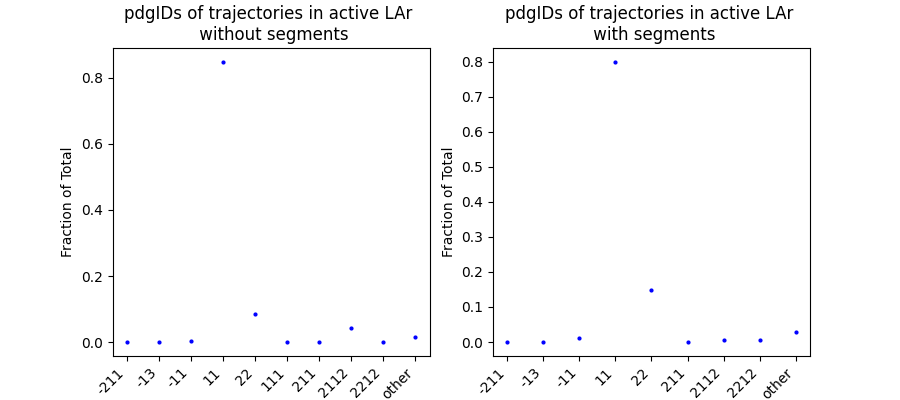

In [65]:
unique_pdgIDs_notracks = np.unique(pdgID_notracks, return_counts=True)
unique_pdgIDs_withtracks = np.unique(pdgID_withtracks, return_counts=True)
print(unique_pdgIDs_notracks)
print(unique_pdgIDs_withtracks)

pdgIDs_values_notracks = np.concatenate((unique_pdgIDs_notracks[0][unique_pdgIDs_notracks[0] < 1e9], [-1]))
pdgIDs_count_notracks = np.concatenate((unique_pdgIDs_notracks[1][unique_pdgIDs_notracks[0] < 1e9], \
                        [np.sum(unique_pdgIDs_notracks[1][unique_pdgIDs_notracks[0] > 1e9])]))
pdgIDs_values_withtracks = np.concatenate((unique_pdgIDs_withtracks[0][unique_pdgIDs_withtracks[0] < 1e9], [-1]))
pdgIDs_count_withtracks = np.concatenate((unique_pdgIDs_withtracks[1][unique_pdgIDs_withtracks[0] < 1e9], \
                        [np.sum(unique_pdgIDs_withtracks[1][unique_pdgIDs_withtracks[0] > 1e9])]))

pdgIDs_count_notracks = pdgIDs_count_notracks/np.sum(pdgIDs_count_notracks)
pdgIDs_count_withtracks = pdgIDs_count_withtracks/np.sum(pdgIDs_count_withtracks)

%matplotlib widget
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(9,4))
axes[0].plot(np.arange(1,len(pdgIDs_values_notracks)+1,1), pdgIDs_count_notracks, 'bo', markersize=2)
axes[0].set_title('pdgIDs of trajectories in active LAr \n without segments')
axes[0].set_ylabel('Fraction of Total')
axes[0].set_xticks(np.arange(1,len(pdgIDs_values_notracks)+1,1))
axes[0].set_xticklabels(list(pdgIDs_values_notracks.astype('str'))[0:-1] + ['other'], fontsize=10, rotation=45, ha='right')

axes[1].plot(np.arange(1,len(pdgIDs_values_withtracks)+1,1), pdgIDs_count_withtracks, 'bo', markersize=2)
axes[1].set_title('pdgIDs of trajectories in active LAr \n with segments')
axes[1].set_ylabel('Fraction of Total')
axes[1].set_xticks(np.arange(1,len(pdgIDs_values_withtracks)+1,1))
axes[1].set_xticklabels(list(pdgIDs_values_withtracks.astype('str'))[0:-1] + ['other'], fontsize =10, rotation=45, ha='right')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
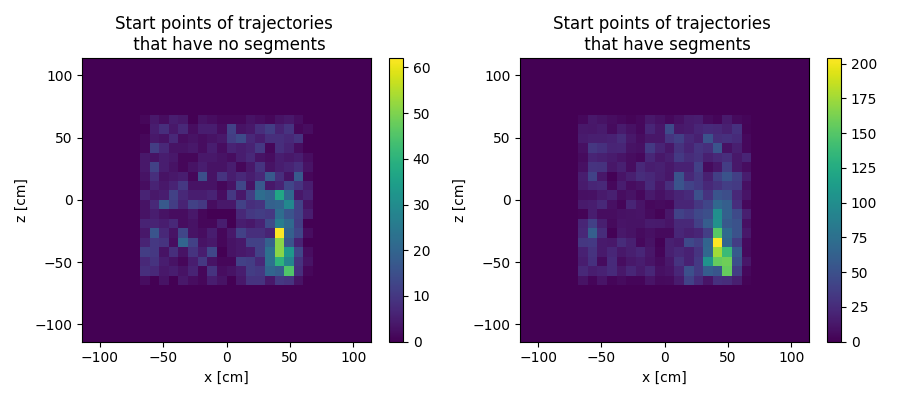

In [20]:
%matplotlib widget
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(9,4))
buffer = 50
h1 = axes[0].hist2d(np.array(xyz_start_notracks)[:,0], np.array(xyz_start_notracks)[:,2], bins=30, \
               range = ((min(x_bounds)-buffer,max(x_bounds)+buffer),(min(z_bounds)-buffer,max(z_bounds)+buffer)), cmap='viridis')
axes[0].set_xlabel('x [cm]')
axes[0].set_ylabel('z [cm]')
axes[0].set_title('Start points of trajectories \n that have no segments')
cbar1 = fig.colorbar(h1[3], ax=axes[0])

h2 = axes[1].hist2d(np.array(xyz_start_withtracks)[:,0], np.array(xyz_start_withtracks)[:,2], bins=30, \
               range = ((min(x_bounds)-buffer,max(x_bounds)+buffer),(min(z_bounds)-buffer,max(z_bounds)+buffer)), cmap='viridis')
axes[1].set_xlabel('x [cm]')
axes[1].set_ylabel('z [cm]')
axes[1].set_title('Start points of trajectories \n that have segments')
cbar2 = fig.colorbar(h2[3], ax=axes[1])

plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
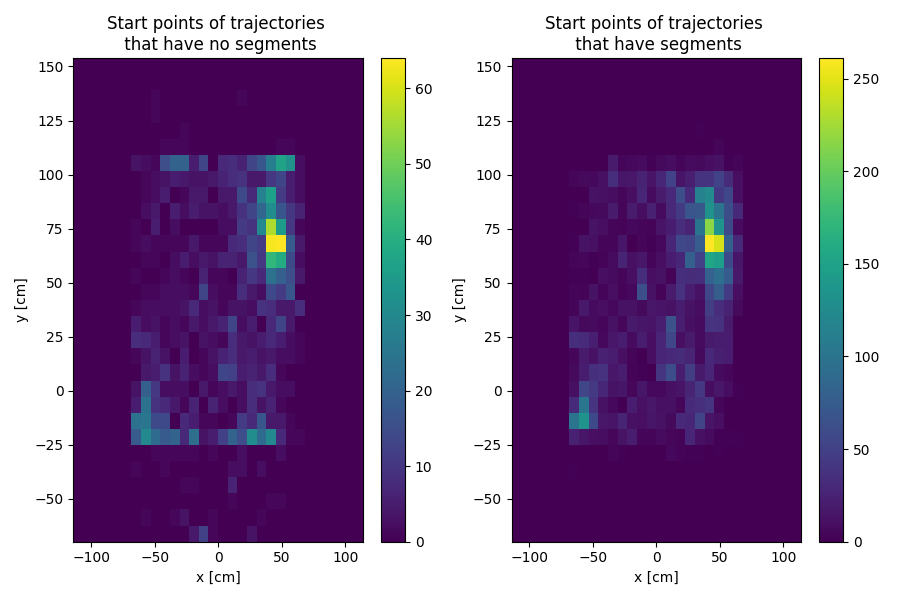

In [74]:
%matplotlib widget
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(9,6))
buffer = 50
h1 = axes[0].hist2d(np.array(xyz_start_notracks)[:,0], np.array(xyz_start_notracks)[:,1], bins=30, \
               range = ((min(x_bounds)-buffer,max(x_bounds)+buffer),(min(y_bounds)-buffer,max(y_bounds)+buffer)), cmap='viridis')
axes[0].set_xlabel('x [cm]')
axes[0].set_ylabel('y [cm]')
axes[0].set_title('Start points of trajectories \n that have no segments')
cbar1 = fig.colorbar(h1[3], ax=axes[0])

h2 = axes[1].hist2d(np.array(xyz_start_withtracks)[:,0], np.array(xyz_start_withtracks)[:,1], bins=30, \
               range = ((min(x_bounds)-buffer,max(x_bounds)+buffer),(min(y_bounds)-buffer,max(y_bounds)+buffer)), cmap='viridis')
axes[1].set_xlabel('x [cm]')
axes[1].set_ylabel('y [cm]')
axes[1].set_title('Start points of trajectories \n that have segments')
cbar2 = fig.colorbar(h2[3], ax=axes[1])

plt.tight_layout()

Text(0.5, 0, 'cm')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
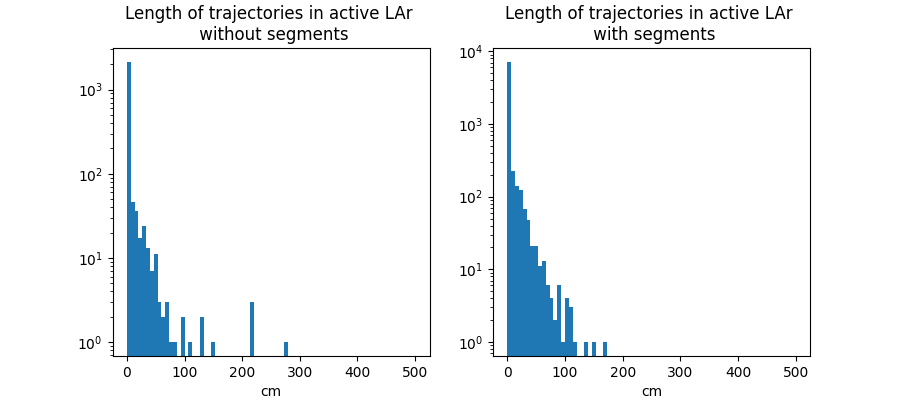

In [67]:
%matplotlib widget
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(9,4))
axes[0].hist(length_notracks, bins=75, range=(0, 500))
axes[0].set_yscale('log')
axes[0].set_title('Length of trajectories in active LAr \n without segments')
axes[0].set_xlabel('cm')

axes[1].hist(length_withtracks, bins=75, range=(0, 500))
axes[1].set_yscale('log')
axes[1].set_title('Length of trajectories in active LAr \n with segments')
axes[1].set_xlabel('cm')

Text(0.5, 1.0, 'E_start of trajectories in active LAr \n with segments')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
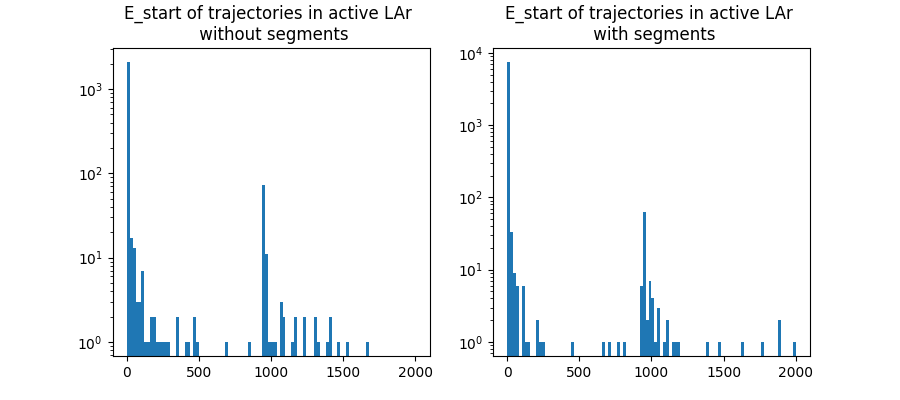

In [69]:
%matplotlib widget
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(9,4))
axes[0].hist(E_start_notracks, bins=100, range=(0,2000))
axes[0].set_yscale('log')
axes[0].set_title('E_start of trajectories in active LAr \n without segments')

axes[1].hist(E_start_withtracks, bins=100, range=(0,2000))
axes[1].set_yscale('log')
axes[1].set_title('E_start of trajectories in active LAr \n with segments')

In [71]:
print(nWithoutTracks)
print(nWithTracks)
print(nWithoutTracks / (nWithTracks+nWithoutTracks))

2301
7832
0.2270798381525708
